Let us start by importing and reading the dataset i.e. housing.csv

In [2]:
import pandas as pd

housing = pd.read_csv("D:\House-Price-Prediction\Datasets\housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
#top 5 rows in the dataset

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#info is useful to get a quick description of the data

housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#find out what categories exist and how many districts belong to each category by using the value_counts() method

housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Function that saves image in a sibling directory. Creates the directory if it doesn't exist. Image saved in png.

In [7]:
#function to save image
import os
from pathlib import Path
import matplotlib.pyplot as plt

#In certain dev environments like vscode, working directory may be where script is executed (not necessarily stored)

directory = Path().resolve() #reslove() gives the absolute path
img_path = directory/'saved_images' #Path represents current working directory
img_path.mkdir(parents = True, exist_ok= True) #makes directory if it doesn't exist. Same for parent directory.

def save_img(img_id, tight_layout = True, img_extension = 'png', resolution = 300 ):

    path = img_path/ f'{img_id}.{img_extension}'
    if tight_layout:
        plt.tight_layout() #reduce padding and optimize figure layout
    plt.savefig(path, format = img_extension, dpi = resolution) #save the image

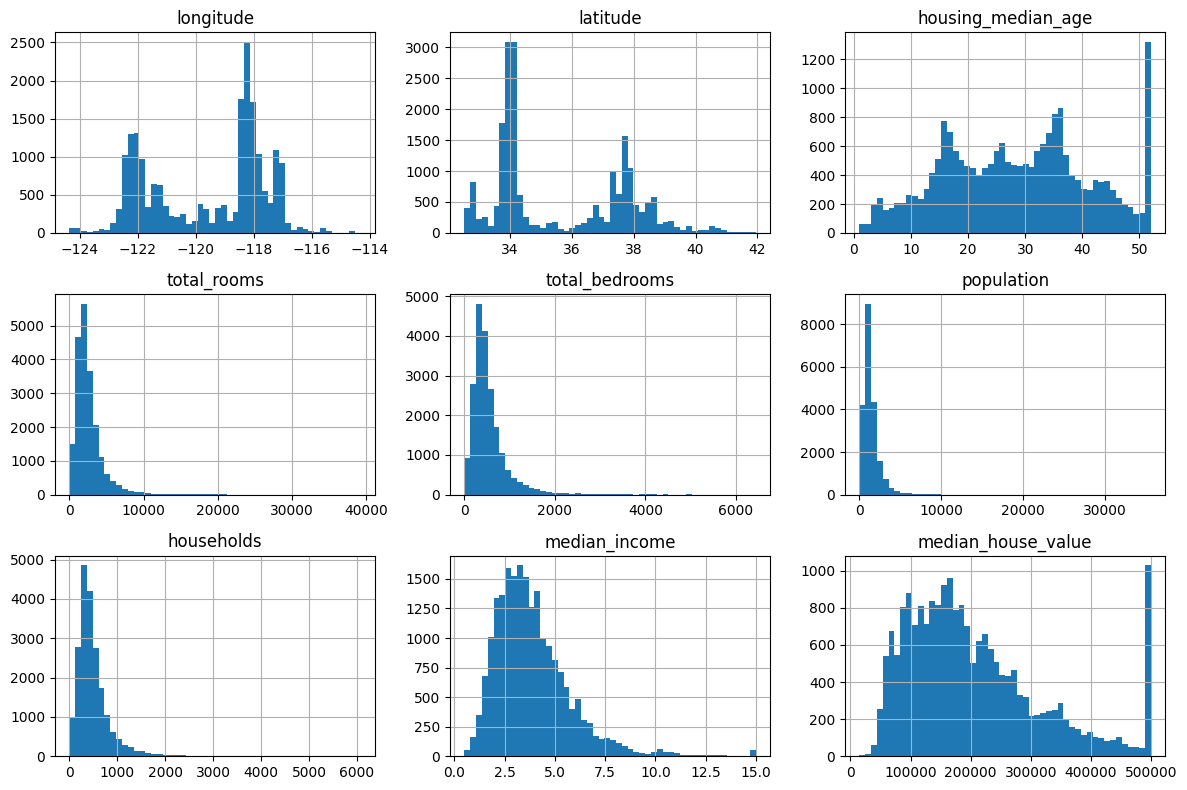

In [8]:
#plotting histogram

housing.hist(bins = 50, figsize = (12,8))
save_img("attribute_histogram_plots")
plt.show()

#### Test Set
It may seem strange to set aside part of the data early on, but it's essential for preventing data snooping bias. Your brain is naturally good at spotting patterns, and if you analyze the test set before selecting your model, you might subconsciously make choices that fit the test data too well. This leads to overly optimistic performance estimates, and the real-world performance of your model may not match expectations.

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 3)

Creating strata for median income.

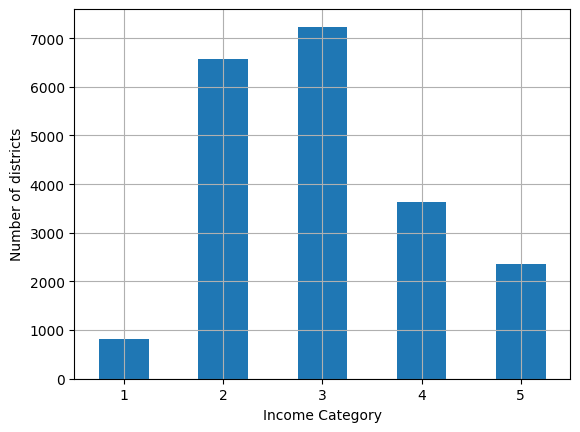

In [10]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels= [1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [11]:
# from sklearn.model_selection import StratifiedShuffleSplit
# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state= 3)

In [12]:
# strat_splits = [] #list to store all splits
# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     strat_train_set_n = housing.iloc[train_index] #train set for this split
#     strat_test_set_n = housing.iloc[test_index] #Test set for this split
#     strat_splits.append([strat_train_set_n, strat_test_set_n]) #store split

In [13]:
#strat_train_set, strat_test_set = strat_splits[0] #selecting the first split

In [14]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify= housing["income_cat"], random_state=3)

In [15]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) #Don't need it anymore(after stratification)

In [17]:
#make a copy of the original so you can revert to it afterwards

housing = strat_train_set.copy()

Visualize Data

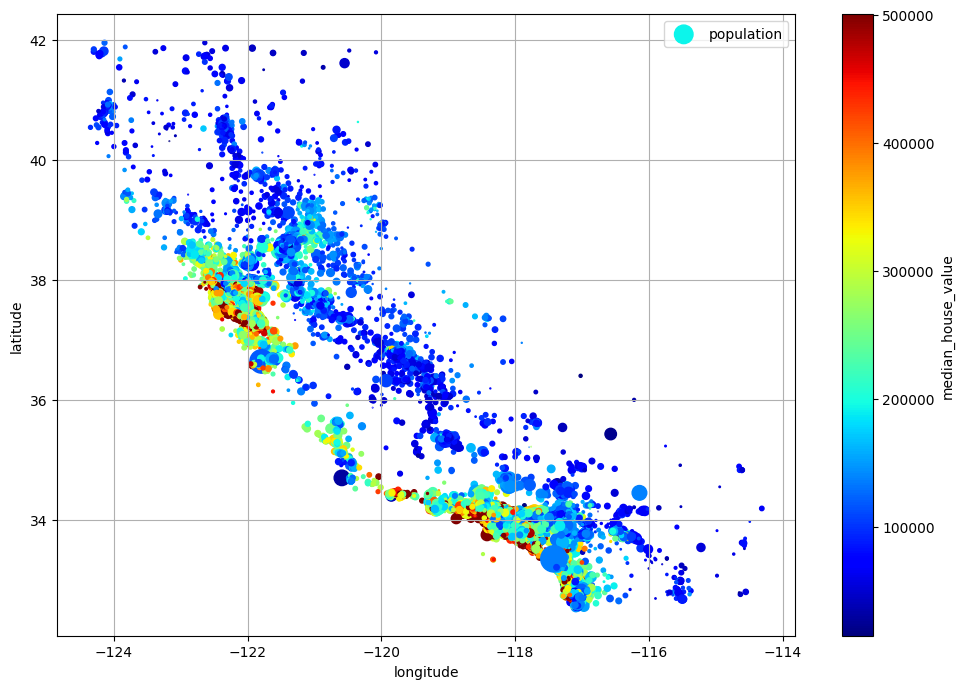

In [18]:
#cmap = predefined color map. Ranges from blue(low value) to red(high value)
# s = size of circle(districts popn), c = color(price)

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label = "population", c="median_house_value", 
             cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
save_img("Geographical Data")
plt.show()


Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method

In [19]:
corr_matrix = housing.corr(numeric_only=True) #since ocean proximity has string values
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687778
total_rooms           0.132725
housing_median_age    0.104174
households            0.066143
total_bedrooms        0.048847
population           -0.025532
longitude            -0.047638
latitude             -0.141908
Name: median_house_value, dtype: float64

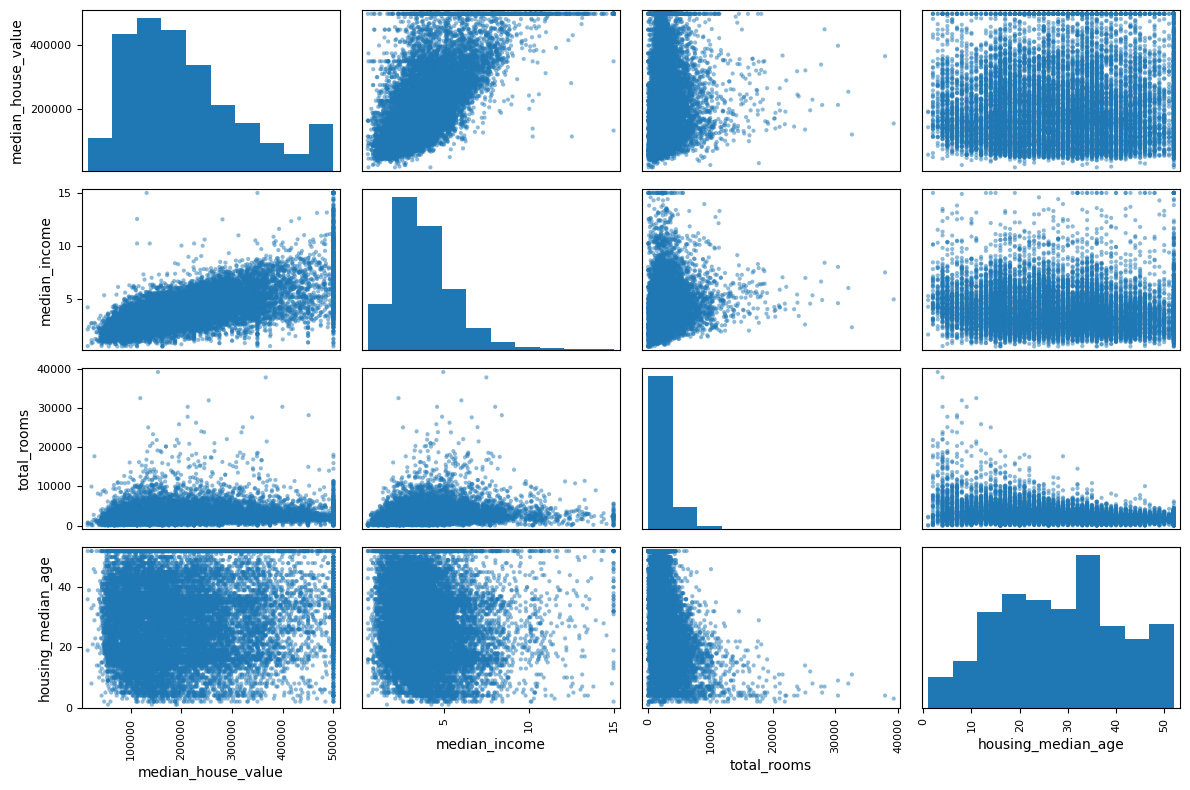

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
save_img("scatter matrix")
plt.show()

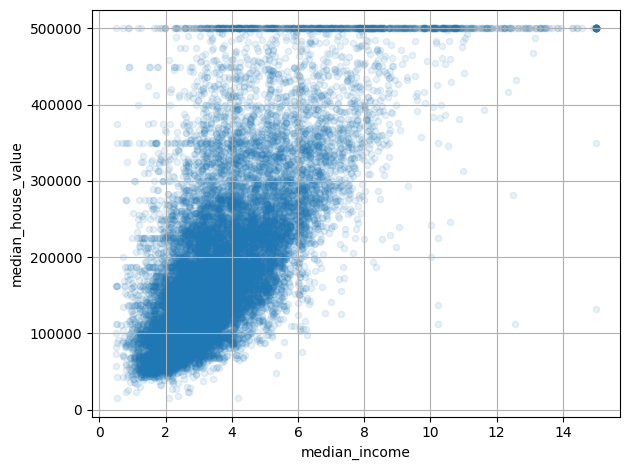

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
save_img("median income vs median house value")
plt.show()

In [22]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["people_per_house"] = housing["population"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]

In [23]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687778
rooms_per_house       0.147878
total_rooms           0.132725
housing_median_age    0.104174
households            0.066143
total_bedrooms        0.048847
people_per_house     -0.019811
population           -0.025532
longitude            -0.047638
latitude             -0.141908
bedrooms_ratio       -0.255438
Name: median_house_value, dtype: float64

#### Prepare the data for ML Algorithms

In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
#median = housing["total_bedrooms"].median()  # Compute median
#housing["total_bedrooms"].fillna(median, inplace=True)  # Fill missing values

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but you cannot be sure that there won’t be any missing values in new data
after the system goes live, so it is safer to apply the imputer to all the numerical
attributes

In [27]:
imputer.statistics_ #All median values

array([-118.49  ,   34.25  ,   29.    , 2130.    ,  435.    , 1165.    ,
        409.    ,    3.5313])

In [28]:
X = imputer.transform(housing_num) # fill all the missing values using the imputer

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matri‐
ces) even when they are fed Pandas DataFrames as input. So, the output of
imputer.transform(housing_num) is a NumPy array: X has neither column names
nor index. Luckily, it’s not too hard to wrap X in a DataFrame and recover the column
names and index from housing_num:

In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

#### Handling Text and Categorical Attributes

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
9558,INLAND
16606,INLAND
4769,<1H OCEAN
12583,INLAND
18209,NEAR BAY
6513,<1H OCEAN
9329,<1H OCEAN
10221,NEAR OCEAN
12540,<1H OCEAN
6511,<1H OCEAN


In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [32]:
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.]])

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases
(e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is
obviously not the case for the ocean_proximity column (for example, categories 0
and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common
solution is to create one binary attribute per category: one attribute equal to 1 when
the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the
category is "INLAND" (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
The new attributes are sometimes called dummy attributes. 

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown="ignore") #ignores new/untrained categories and returns 0
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [35]:
housing_cat_1hot 
# By default, the output of a OneHotEncoder is a SciPy sparse matrix, instead of a NumPy array

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

A sparse matrix is a very efficient representation for matrices that contain mostly
zeros. Indeed, internally it only stores the nonzero values and their positions. When
a categorical attribute has hundreds or thousands of categories, one-hot encoding it
results in a very large matrix full of 0s except for a single 1 per row. In this case, a
sparse matrix is exactly what you need: it will save plenty of memory and speed up
computations. You can use a sparse matrix mostly like a normal 2D array,12 but if you
want to convert it to a (dense) NumPy array, just call the toarray() method:

In [36]:
#housing_cat_1hot.toarray() #Alternatively, you can set sparse=False when creating the OneHotEncoder, in which case the transform() method will return a regular (dense) NumPy array directly.

Pandas has a function called get_dummies(), which also converts each categorical
feature into a one-hot representation, with one binary feature per category:

In [37]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


It looks nice and simple, so why not use it instead of OneHotEncoder? Well, the
advantage of OneHotEncoder is that it remembers which categories it was trained
on. This is very important because once your model is in production, it should be
fed exactly the same features as during training: no more, no less. 

In [38]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the
column names in the feature_names_in_ attribute. Scikit-Learn then ensures that
any DataFrame fed to this estimator after that (e.g., to transform() or predict())
has the same column names. Transformers also provide a get_feature_names_out()
method that you can use to build a DataFrame around the transformer’s output:

In [39]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [40]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [41]:
df_output = pd.DataFrame(cat_encoder.transform(df_test).toarray(), columns= cat_encoder.get_feature_names_out(), index= df_test.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


### Feature Scaling & Transformation

This is performed by subtracting the min value and dividing by the dif‐
ference between the min and the max. 

In [42]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range= (-1,1)) #0 to 1 by default
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Standardization is different: first it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standard‐
ized values have a standard deviation equal to 1). Unlike min-max scaling, standardi‐
zation does not restrict values to a specific range. However, standardization is much
less affected by outliers. For example, suppose a district has a median income equal
to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range
would map this outlier down to 1 and it would crush all the other values down to
0–0.15, whereas standardization would not be much affected. 

In [43]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_num)

In [44]:
housing_num_min_max_scaled

array([[-0.53187251,  0.20935175, -1.        , ..., -0.95128787,
        -0.9121855 , -0.34294699],
       [-0.48007968,  0.27736451,  0.29411765, ..., -0.92729617,
        -0.8240421 , -0.84226424],
       [-0.687251  ,  0.27311371, -0.68627451, ..., -0.89427955,
        -0.79246834, -0.47977269],
       ...,
       [ 0.20119522, -0.7130712 ,  0.68627451, ..., -0.96120968,
        -0.91843447, -0.35628474],
       [-0.49203187,  0.0053135 , -0.37254902, ..., -0.84921102,
        -0.75497451, -0.36865698],
       [-0.42828685,  0.2794899 ,  1.        , ..., -0.98183806,
        -0.94079921, -0.67527344]], shape=(16512, 8))

In [45]:
housing_num_standard_scaled

array([[-1.21325152,  1.21896716, -2.19459589, ..., -0.48352302,
        -0.60582056,  0.72767288],
       [-1.08361714,  1.36884276,  0.42315777, ..., -0.10739129,
         0.09964497, -1.16736066],
       [-1.60215467,  1.35947554, -1.55998894, ...,  0.41022925,
         0.35234904,  0.20838522],
       ...,
       [ 0.62157361, -0.81372066,  1.21641646, ..., -0.63907282,
        -0.65583491,  0.67705281],
       [-1.11353276,  0.76934036, -0.92538199, ...,  1.11679446,
         0.65243513,  0.63009706],
       [-0.95398275,  1.37352637,  1.85102341, ..., -0.9624758 ,
        -0.83483363, -0.53358891]], shape=(16512, 8))

In [46]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

Until now, we've mostly focused on transforming features (X) — but targets can also need transformation, especially when:

    Their values have a heavy tail (e.g., skewed or outliers).

    You're applying regression, and transforming the output could improve accuracy.

In [47]:
#example run

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

our_scaler = StandardScaler()
scaled_label = our_scaler.fit_transform(housing_labels.to_frame())

our_model = LinearRegression()
our_model.fit(housing[['median_income']], scaled_label)

new_data = housing[['median_income']].iloc[:5]
scaled_prediction = our_model.predict(new_data)

unscaled_prediction = our_scaler.inverse_transform(scaled_prediction)

unscaled_prediction

array([[264697.3190204 ],
       [114168.14469211],
       [223448.4748079 ],
       [280535.7109161 ],
       [152119.57625738]])

In [48]:
#simpler way to do the same

from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor = LinearRegression(), transformer = StandardScaler())

model.fit(housing[['median_income']], housing_labels)

prediction = model.predict(pd.DataFrame([[22]], columns=["median_income"]))
prediction

array([960621.87172003])

Custom Transformers

In [49]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log , inverse_func= np.exp)
log_pop = log_transformer.transform(housing[['population']])

The inverse_func argument is optional. It lets you specify an inverse transform
function, e.g., if you plan to use your transformer in a TransformedTargetRegressor.
Your transformation function can take hyperparameters as additional arguments. For
example, here’s how to create a transformer that computes the same Gaussian RBF
similarity measure as earlier:

In [50]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args= dict(Y = [[35.]], gamma = 0.1 ))
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])

In [51]:
sf_coords = 37.7749, -122.41

sf_transformer = FunctionTransformer(rbf_kernel, kw_args= dict(Y = [sf_coords], gamma = 0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [52]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]]/ X[:, [1]])
ratio_transformer.transform(np.array([[2.,3.],[5.,6.]]))

array([[0.66666667],
       [0.83333333]])

FunctionTransformer is very handy, but what if you would like your transformer to
be trainable, learning some parameters in the fit() method and using them later
in the transform() method? For this, you need to write a custom class. Scikit-Learn
relies on duck typing, so this class does not have to inherit from any particular base
class. All it needs is three methods: fit() (which must return self), transform(),
and fit_transform().
You can get fit_transform() for free by simply adding TransformerMixin as a base
class: the default implementation will just call fit() and then transform(). If you
add BaseEstimator as a base class (and avoid using *args and **kwargs in your
constructor), you will also get two extra methods: get_params() and set_params().
These will be useful for automatic hyperparameter tuning.
For example, here’s a custom transformer that acts much like the StandardScaler:

In [53]:
ratio_transformer.get_params()

{'accept_sparse': False,
 'check_inverse': True,
 'feature_names_out': None,
 'func': <function __main__.<lambda>(X)>,
 'inv_kw_args': None,
 'inverse_func': None,
 'kw_args': None,
 'validate': False}

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerCopy(BaseEstimator, TransformerMixin):
    
    def __init__(self, with_mean = True): #no *args or **kwargs, get_params() and set_params() won’t know what parameters your object takes.
         self.with_mean = with_mean
    
    def fit(self, X, y=None): #y is the target vector, often ignored in transformers, but still required for compatibility.
         X = check_array(X) #makes sure X is a clean, finite NumPy array with the right shape.
         self.mean_ = X.mean(axis=0)
         self.scale_ = X.std(axis=0)
         self.n_features_in_ = X.shape[1]

         return self

    def transform(self, X):
        check_is_fitted(self) #ensures you've called .fit() before .transform() by checking if required attributes (like mean_, scale_) exist.
        X = check_array(X)

        assert self.n_features_in_ == X.shape[1]

        if self.with_mean:
              X = X - self.mean_
        return X / self.scale_

In [55]:
test_scaler = StandardScalerCopy()

train_data = np.array([[2,3], [4,7]])

test_scaler.fit(train_data)

test_data = np.array([[2,3], [4,6]])

transformed_test_data = test_scaler.transform(test_data)
transformed_test_data

array([[-1. , -1. ],
       [ 1. ,  0.5]])

In [56]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):

    def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y = None, sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters, random_state= self.random_state)
        self.kmeans_.fit(X, sample_weight = sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f'Cluster {i} similarity' for i in range(self.n_clusters)]
    
    

In [57]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=12)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight = housing_labels)

In [58]:
similarity_df = pd.DataFrame(similarities, columns= cluster_simil.get_feature_names_out())
similarity_df.round(2)

,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
0,0.79,0.00,0.00,0.00,0.01,0.46,0.00,0.00,0.00,0.40
1,0.44,0.00,0.00,0.00,0.02,0.69,0.00,0.00,0.00,0.19
2,0.54,0.00,0.00,0.00,0.07,0.07,0.00,0.00,0.00,0.10
3,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.97,0.01
4,0.99,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.64
...,...,...,...,...,...,...,...,...,...,...
16507,0.00,0.08,0.33,0.00,0.00,0.00,0.02,0.21,0.10,0.00
16508,0.00,0.94,0.02,0.11,0.00,0.00,0.70,0.77,0.00,0.00
16509,0.00,0.98,0.03,0.08,0.00,0.00,0.67,0.88,0.00,0.00
16510,0.52,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.01,0.98


In [59]:
# combined = housing.copy()
# combined = pd.concat([combined, similarity_df], axis = 1)

In [60]:
# combined.describe().round(2)

In [61]:
# fig, ax = plt.subplots(figsize = (10, 7))

# dominant_cluster = np.argmax(similarities, axis=1)

# scatter = ax.scatter(
#     combined['longitude'],
#     combined['latitude'],
#     c = dominant_cluster,
#     s = combined['population']/100,
#     cmap = 'jet',
#     alpha = 0.6,
#     edgecolor = 'k',
#     label = 'Districts'
# )

### Transformation Pipelines
As you can see, there are many data transformation steps that need to be executed
in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for numerical attributes,
which will first impute then scale the input features:

In [62]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),
                              ("standardize", StandardScaler())])

In [63]:
import sklearn
sklearn.set_config(display="diagram")

In [64]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

If you don’t want to name the transformers, you can use the make_pipeline() func‐
tion instead; it takes transformers as positional arguments and creates a Pipeline
using the names of the transformers’ classes, in lowercase and without underscores
(e.g., "simpleimputer"):

In [65]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [66]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.21,  1.22, -2.19, -0.26, -0.46, -0.48, -0.61,  0.73],
       [-1.08,  1.37,  0.42, -0.15,  0.1 , -0.11,  0.1 , -1.17]])

In [67]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns = num_pipeline.get_feature_names_out(), index = housing_num.index )
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9558,-1.213252,1.218967,-2.194596,-0.260675,-0.461964,-0.483523,-0.605821,0.727673
16606,-1.083617,1.368843,0.423158,-0.152219,0.103722,-0.107391,0.099645,-1.167361
4769,-1.602155,1.359476,-1.559989,0.470150,0.278702,0.410229,0.352349,0.208385
12583,-0.121331,0.563261,-1.480663,1.440770,0.925886,1.133492,1.013065,0.927065
18209,-1.337900,1.050357,1.057765,-0.400708,-0.169533,0.669479,-0.200441,-0.689585
...,...,...,...,...,...,...,...,...
19013,0.277544,-0.134597,1.216416,-0.412607,-0.461964,-0.562616,-0.579497,-0.446378
14003,0.641517,-0.888658,1.295742,-0.226354,0.055783,0.112312,0.081219,-1.024347
20529,0.621574,-0.813721,1.216416,-0.609385,-0.680089,-0.639073,-0.655835,0.677053
544,-1.113533,0.769340,-0.925382,0.585929,0.482445,1.116794,0.652435,0.630097


we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer capable of handling
all columns, applying the appropriate transformations to each column. For this,
you can use a ColumnTransformer. For example, the following ColumnTransformer
will apply num_pipeline (the one we just defined) to the numerical attributes and
cat_pipeline to the categorical attribute:

In [68]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [69]:
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [70]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [71]:
housing_prepared = preprocessing.fit_transform(housing)

In [72]:
housing_prepared_df = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
housing_prepared_df

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
9558,-1.213252,1.218967,-2.194596,-0.260675,-0.461964,-0.483523,-0.605821,0.727673,0.0,1.0,0.0,0.0,0.0
16606,-1.083617,1.368843,0.423158,-0.152219,0.103722,-0.107391,0.099645,-1.167361,0.0,1.0,0.0,0.0,0.0
4769,-1.602155,1.359476,-1.559989,0.470150,0.278702,0.410229,0.352349,0.208385,1.0,0.0,0.0,0.0,0.0
12583,-0.121331,0.563261,-1.480663,1.440770,0.925886,1.133492,1.013065,0.927065,0.0,1.0,0.0,0.0,0.0
18209,-1.337900,1.050357,1.057765,-0.400708,-0.169533,0.669479,-0.200441,-0.689585,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,0.277544,-0.134597,1.216416,-0.412607,-0.461964,-0.562616,-0.579497,-0.446378,0.0,1.0,0.0,0.0,0.0
14003,0.641517,-0.888658,1.295742,-0.226354,0.055783,0.112312,0.081219,-1.024347,0.0,0.0,0.0,0.0,1.0
20529,0.621574,-0.813721,1.216416,-0.609385,-0.680089,-0.639073,-0.655835,0.677053,1.0,0.0,0.0,0.0,0.0
544,-1.113533,0.769340,-0.925382,0.585929,0.482445,1.116794,0.652435,0.630097,1.0,0.0,0.0,0.0,0.0


Let’s recap what the pipeline will do and why:

• Missing values in numerical features will be imputed by replacing them with
the median, as most ML algorithms don’t expect missing values. In categorical
features, missing values will be replaced by the most frequent category.

• The categorical feature will be one-hot encoded, as most ML algorithms only•
accept numerical inputs.

• A few ratio features will be computed and added: bedrooms_ratio,•
rooms_per_house, and people_per_house. Hopefully these will better correlate
with the median house value, and thereby help the ML models.

• A few cluster similarity features will also be added. These will likely be more•
useful to the model than latitude and longitude.

• Features with a long tail will be replaced by their logarithm, as most models•
prefer features with roughly uniform or Gaussian distributions.

• All numerical features will be standardized, as most ML algorithms prefer when•
all features have roughly the same scale.

The code that builds the pipeline to do all of this should look familiar to you by now:

In [73]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline = make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(np.log, feature_names_out="one-to-one"), #one-to-one -> same name for output as input feature
        StandardScaler()
    )

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1. , random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                           "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
remainder=default_num_pipeline) #column remaining: housing_median_age


In [74]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
housing_prepared_df

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
9558,-0.725945,0.954760,0.017656,-0.291033,0.004949,-0.339458,-0.528010,0.883986,1.048259e-09,7.257764e-01,...,2.901583e-01,3.750128e-01,2.760046e-18,7.553355e-06,0.0,1.0,0.0,0.0,0.0,-2.194596
16606,0.583872,-0.484769,-0.060260,0.426459,0.149801,0.199934,0.415684,-1.590416,4.101540e-10,3.942075e-01,...,2.858895e-01,7.106305e-01,1.972122e-18,1.835623e-06,0.0,1.0,0.0,0.0,0.0,0.423158
4769,-0.544460,0.149572,-0.007252,0.589180,0.768517,0.704683,0.639992,0.440062,7.165940e-13,3.531108e-01,...,2.292857e-02,9.072183e-02,6.264343e-23,6.102868e-08,1.0,0.0,0.0,0.0,0.0,-1.559989
12583,-0.830536,0.469331,0.000501,1.064017,1.377244,1.193164,1.095314,1.032508,6.782931e-03,1.628367e-03,...,1.086004e-01,1.551279e-03,5.143777e-07,3.002541e-02,0.0,1.0,0.0,0.0,0.0,-1.480663
18209,0.782366,-0.538904,0.198407,0.125983,-0.208921,0.900690,0.090119,-0.651464,2.619781e-09,9.671265e-01,...,2.183634e-01,1.324140e-01,4.130979e-18,2.857907e-05,0.0,0.0,0.0,1.0,0.0,1.057765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,-0.236938,0.332836,-0.023804,-0.291033,-0.228782,-0.486600,-0.478134,-0.296456,6.541539e-01,1.560144e-07,...,6.909767e-05,1.739462e-08,7.306858e-03,8.658658e-02,0.0,1.0,0.0,0.0,0.0,1.216416
14003,0.732968,-0.590247,-0.012789,0.378286,0.052515,0.437517,0.397786,-1.263517,1.882879e-01,3.334336e-14,...,8.360930e-11,2.863428e-16,2.749750e-01,8.238245e-04,0.0,0.0,0.0,0.0,1.0,1.295742
20529,-0.304642,-0.090856,-0.025853,-0.713522,-0.609235,-0.645911,-0.628124,0.844569,2.676140e-01,1.579010e-13,...,3.594238e-10,1.856644e-15,2.731882e-01,1.497660e-03,1.0,0.0,0.0,0.0,0.0,1.216416
544,-0.388150,-0.081096,0.051160,0.757111,0.857532,1.183667,0.865771,0.807340,1.106727e-06,7.152659e-01,...,4.657171e-01,5.214046e-02,2.139106e-14,2.041000e-03,1.0,0.0,0.0,0.0,0.0,-0.925382


In [75]:
from sklearn.linear_model import LinearRegression

lin_reg  = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000141ABE53490>)])),
                ('linearregression', LinearRegression())])

In [76]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) #rounded to nearest hundred


array([227700.,  75300., 215900., 175400., 136600.])

In [77]:
housing_labels.iloc[:5].values

array([191300., 148500., 250800., 135500., 371400.])

In [78]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

69694.5617888468

Model seeems to be underfitting. The main ways to fix underfitting are to select a
more powerful model, to feed the training algorithm with better features, or to reduce
the constraints on the model. This model is not regularized, which rules out the last
option. You could try to add more features, but first you want to try a more complex
model to see how it does

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000141ABE53490>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [80]:
tree_pred = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, tree_pred)
tree_rmse

0.0

No error at all? It is much more likely that the model has badly overfit the data. How can you be sure?
You don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training
and part of it for model validation.

In [81]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the RMSE. It’s a
negative value, so you need to switch the sign of the output to get
the RMSE scores.

In [82]:
tree_rmses

array([64793.50549085, 67986.98790576, 64816.87675639, 70082.51587708,
       65682.74570336, 66324.82197652, 65209.19782389, 65957.50286116,
       68999.50657516, 64865.4375732 ])

In [83]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66471.909854
std       1896.226739
min      64793.505491
25%      64951.377636
50%      65820.124282
75%      67571.446423
max      70082.515877
dtype: float64

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_pred = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
rf_pred.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000141ABE53490>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [85]:
rf_rmses = -cross_val_score(rf_pred, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(rf_rmses).describe()

count       10.000000
mean     47252.149653
std       1285.262985
min      44574.026731
25%      46761.852989
50%      47027.935182
75%      47952.046059
max      49229.362386
dtype: float64